## Customer Segmentation Exercise
Using exercises from Medium blogs


### RFM Calculation
- **RECENCY** - Days since last purchase
- **FREQUENCY** - Total number of purchases
- **MONETARY VALUE** - Total money this customer spent

- Step 1: Calculate RFM Metrics for each customer
- Step 2: Add segment numbers to RFM table
- Step 3: Sort by RFM scores

In [3]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [7]:
#Data from the UCI Machine Learning Repository
#http://archive.ics.uci.edu/ml/datasets/online+retail


df_raw = pd.read_excel("./data/Online Retail.xlsx")

In [8]:
df = df_raw.copy()

In [9]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


***Exploration***

In [10]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [12]:
# Note, some vales are missing

In [13]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [18]:
df.dropna().drop_duplicates().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      401604 non-null object
StockCode      401604 non-null object
Description    401604 non-null object
Quantity       401604 non-null int64
InvoiceDate    401604 non-null datetime64[ns]
UnitPrice      401604 non-null float64
CustomerID     401604 non-null float64
Country        401604 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.6+ MB


In [19]:
#There are 401,604 rows that have no nulls and are not duplicates.

#Note dtypes -- 

In [24]:
df.Country.unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia', 'Czech Republic',
       'Canada', 'Unspecified', 'Brazil', 'USA', 'European Community',
       'Malta', 'RSA'], dtype=object)

In [32]:
print(len(df.Country.unique()))
print(df.Country.unique().shape[0])

38
38


In [33]:
# Let's look at the customers inn each coutnry

customer_and_country = df.loc[:,['Country','CustomerID']].drop_duplicates()



In [41]:
#pandas groupby/aggregate
customer_and_country.groupby(['Country'])['CustomerID'].aggregate('count').head()

Country
Australia     9
Austria      11
Bahrain       2
Belgium      25
Brazil        1
Name: CustomerID, dtype: int64

In [42]:
#build it up, reset index
customer_and_country.groupby(['Country'])['CustomerID'].aggregate('count').reset_index().head()

,Country,CustomerID
0,Australia,9
1,Austria,11
2,Bahrain,2
3,Belgium,25
4,Brazil,1


In [46]:
#continue to build it up, sort on ID, descending (asc = False)
customer_and_country.groupby(['Country'])['CustomerID'].aggregate('count').reset_index().sort_values('CustomerID', ascending=False).head()

,Country,CustomerID
36,United Kingdom,3950
14,Germany,95
13,France,87
31,Spain,31
3,Belgium,25


90%+ from UK. Customer clusters vary by geography, here restrict to UK

In [48]:
df = df.loc[df['Country'] == 'United Kingdom']

In [51]:
#Use notnull as a filter and CustomerID
df = df[pd.notnull(df['CustomerID'])]

In [52]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [58]:
# Check mins and maxes
df[['UnitPrice', 'Quantity']].describe()

,UnitPrice,Quantity
count,361878.000000,361878.000000
mean,3.256007,11.077029
std,70.654731,263.129266
min,0.000000,-80995.000000
25%,1.250000,2.000000
50%,1.950000,4.000000
75%,3.750000,12.000000
max,38970.000000,80995.000000


In [66]:
# Remove negative quantities
#Mask: df['Quantity']>0

df = df[ (df['Quantity']>0)  ]
print(df.shape)
df.info()

(354345, 8)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 354345 entries, 0 to 541893
Data columns (total 8 columns):
InvoiceNo      354345 non-null object
StockCode      354345 non-null object
Description    354345 non-null object
Quantity       354345 non-null int64
InvoiceDate    354345 non-null datetime64[ns]
UnitPrice      354345 non-null float64
CustomerID     354345 non-null float64
Country        354345 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 24.3+ MB


In [78]:
for col in df.columns:
    print(col, ": ", df[col].nunique())

InvoiceNo :  16649
StockCode :  3645
Description :  3844
Quantity :  294
InvoiceDate :  15615
UnitPrice :  403
CustomerID :  3921
Country :  1


In [80]:
# Remake as a list comprehension
[str(col + ': ' + str(df[col].nunique()))    for col in df.columns]

['InvoiceNo: 16649',
 'StockCode: 3645',
 'Description: 3844',
 'Quantity: 294',
 'InvoiceDate: 15615',
 'UnitPrice: 403',
 'CustomerID: 3921',
 'Country: 1']

In [82]:
#Add a column for total price
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']


In [84]:
# order dates
df['InvoiceDate'].describe()

count                  354345
unique                  15615
top       2011-11-14 15:27:00
freq                      542
first     2010-12-01 08:26:00
last      2011-12-09 12:49:00
Name: InvoiceDate, dtype: object

**Recency will use 2011-12-10**

**NOTE: object dtype**

In [88]:
import datetime as dt
NOW = dt.datetime(2011, 12, 10)

In [89]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [90]:
df.InvoiceDate.head()

0   2010-12-01 08:26:00
1   2010-12-01 08:26:00
2   2010-12-01 08:26:00
3   2010-12-01 08:26:00
4   2010-12-01 08:26:00
Name: InvoiceDate, dtype: datetime64[ns]

RFM Table
- Use pandas groupby().agg() to create aggregates 
- agg takes a dictionary of {existing column names: lambda fxn}

In [103]:
df.groupby('CustomerID').agg( {'InvoiceDate': lambda x: (NOW-x.max())}).head()

,InvoiceDate
CustomerID,
12346.0,325 days 13:59:00
12747.0,2 days 09:26:00
12748.0,0 days 11:40:00
12749.0,3 days 14:04:00
12820.0,3 days 08:48:00


In [104]:
df.groupby('CustomerID').agg( {'InvoiceNo': lambda x: len(x)}).head()

,InvoiceNo
CustomerID,
12346.0,1
12747.0,103
12748.0,4596
12749.0,199
12820.0,59


In [105]:
df.groupby('CustomerID').agg( {'TotalPrice': lambda x: x.sum()}).head()

,TotalPrice
CustomerID,
12346.0,77183.60
12747.0,4196.01
12748.0,33719.73
12749.0,4090.88
12820.0,942.34


### RFM TABLE
- Pull it all together

In [106]:
rfmTable = df.groupby('CustomerID').agg( {'InvoiceDate': lambda x: (NOW - x.max()).days, 
                                          'InvoiceNo': lambda x: len(x),
                                          'TotalPrice' : lambda x: x.sum() } ) #end agg

In [107]:
rfmTable['InvoiceDate'] = rfmTable['InvoiceDate'].astype(int)
rfmTable.rename( columns={'InvoiceDate': 'recency',
                       'InvoiceNo': 'frequency', 
                       'TotalPrice': 'monetary_value'},
               inplace=True)

In [109]:
rfmTable.head()

,recency,frequency,monetary_value
CustomerID,,,
12346.0,325,1,77183.60
12747.0,2,103,4196.01
12748.0,0,4596,33719.73
12749.0,3,199,4090.88
12820.0,3,59,942.34


Reads as 
- Customer 12346 bouth 325 days ago, bought once, and spent 77k

The easiest way to split metrics into segments is by quartile
- gives an easy starting point for detailed analysis
- 4 are easy to explain

In [114]:
quantiles = rfmTable.quantile(q=[0.25, 0.50, 0.75])
quantiles = quantiles.to_dict()

In [115]:
quantiles

{'frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 99.0},
 'monetary_value': {0.25: 300.03999999999996,
  0.5: 651.8199999999999,
  0.75: 1575.89},
 'recency': {0.25: 17.0, 0.5: 50.0, 0.75: 142.0}}

### Segmented RFM table
- Best customers have low recency, high frequency, high money

In [117]:
segmented_rfm = rfmTable.copy()

In [118]:
# From the article:

def RScore(x, p, d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4
    
def FMScore(x, p, d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.5]:
        return 3
    elif x<= d[p][0.75]:
        return 2
    else: 
        return 1


Add segment numbers to the new table... apply!

In [119]:
segmented_rfm['r_quartile'] = segmented_rfm['recency'].apply(RScore, 
                                                             args=('recency', quantiles))

In [120]:
segmented_rfm.head()

,recency,frequency,monetary_value,r_quartile
CustomerID,,,,
12346.0,325,1,77183.60,4
12747.0,2,103,4196.01,1
12748.0,0,4596,33719.73,1
12749.0,3,199,4090.88,1
12820.0,3,59,942.34,1


In [121]:
segmented_rfm['f_quartile'] = segmented_rfm['frequency'].apply(FMScore, 
                                                               args=('frequency',quantiles))

In [122]:
segmented_rfm.head()

,recency,frequency,monetary_value,r_quartile,f_quartile
CustomerID,,,,,
12346.0,325,1,77183.60,4,4
12747.0,2,103,4196.01,1,1
12748.0,0,4596,33719.73,1,1
12749.0,3,199,4090.88,1,1
12820.0,3,59,942.34,1,2


In [123]:
segmented_rfm['m_quartile'] = segmented_rfm['monetary_value'].apply(FMScore,
                                                                   args= ('monetary_value',
                                                                         quantiles))

In [125]:
segmented_rfm.head()

,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile
CustomerID,,,,,,
12346.0,325,1,77183.60,4,4,1
12747.0,2,103,4196.01,1,1,1
12748.0,0,4596,33719.73,1,1,1
12749.0,3,199,4090.88,1,1,1
12820.0,3,59,942.34,1,2,2


### RFM Score

In [136]:
segmented_rfm['RFMScore'] = segmented_rfm['r_quartile'].map(str) + segmented_rfm['f_quartile'].map(str) + segmented_rfm['m_quartile'].map(str)

In [137]:
segmented_rfm.head()

,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,RFMScore
CustomerID,,,,,,,
12346.0,325,1,77183.60,4,4,1,441
12747.0,2,103,4196.01,1,1,1,111
12748.0,0,4596,33719.73,1,1,1,111
12749.0,3,199,4090.88,1,1,1,111
12820.0,3,59,942.34,1,2,2,122


### SORT FOR CUSTOMERS

In [142]:
segmented_rfm[segmented_rfm['RFMScore'] == '111'].head()

,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,RFMScore
CustomerID,,,,,,,
12747.0,2,103,4196.01,1,1,1,111
12748.0,0,4596,33719.73,1,1,1,111
12749.0,3,199,4090.88,1,1,1,111
12839.0,2,314,5591.42,1,1,1,111
12841.0,4,420,4022.35,1,1,1,111


In [145]:
segmented_rfm[segmented_rfm['RFMScore'] == '111'].sort_values('monetary_value',ascending=False).head()

,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,RFMScore
CustomerID,,,,,,,
18102.0,0,431,259657.30,1,1,1,111
17450.0,8,337,194550.79,1,1,1,111
17511.0,2,963,91062.38,1,1,1,111
16684.0,4,277,66653.56,1,1,1,111
14096.0,4,5111,65164.79,1,1,1,111


# (2): SEGMENTATION PART 2 --- WINE

In [146]:
# treating as if we start fresh

In [ ]:
import pandas as pd

In [152]:
df_offers = pd.read_excel("./data/WineKMC.xlsx", sheetname=0)
df_offers.columns = ['offer_id', 'campaign', 'varietal', 'min_qty', 'discount',
                    'origin', 'past_peak']
df_offers.head()

,offer_id,campaign,varietal,min_qty,discount,origin,past_peak
0,1,January,Malbec,72,56,France,False
1,2,January,Pinot Noir,72,17,France,False
2,3,February,Espumante,144,32,Oregon,True
3,4,February,Champagne,72,48,France,True
4,5,February,Cabernet Sauvignon,144,44,New Zealand,True


In [153]:
df_transactions = pd.read_excel('./data/WineKMC.xlsx', sheetname=1)
df_transactions.columns = ['customer_name', 'offer_id']
df_transactions['n'] = 1
df_transactions.head()

,customer_name,offer_id,n
0,Smith,2,1
1,Smith,24,1
2,Johnson,17,1
3,Johnson,24,1
4,Johnson,26,1


### Cluster customer behaviors

In [154]:
# K MEANS
# CENTROIDS


In [197]:
# do a merge
# pandas picks the column by default, though I could do it manually
df2 = pd.merge(df_offers, df_transactions)

In [198]:
df2.head()

,offer_id,campaign,varietal,min_qty,discount,origin,past_peak,customer_name,n
0,1,January,Malbec,72,56,France,False,Thomas,1
1,1,January,Malbec,72,56,France,False,Jackson,1
2,1,January,Malbec,72,56,France,False,Mitchell,1
3,1,January,Malbec,72,56,France,False,Peterson,1
4,1,January,Malbec,72,56,France,False,Wood,1


In [282]:
# PIVOT number of time each customer correspoded to an offer

piv = df2.pivot_table(index=['customer_name'],columns=['offer_id'], values = 'n')


piv = piv.fillna(0).reset_index()
x_cols = piv.columns[1:]
piv.head()
#piv.head()

offer_id,customer_name,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,Adams,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,Allen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,Anderson,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Bailey,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,Baker,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [283]:
##### from sklearn.cluster import KMeans

cluster = KMeans(n_clusters=5)
# slice matrix to use only the 0/1 indicator columns

piv['cluster'] = cluster.fit_predict(piv[piv.columns[1:]])

In [284]:
piv.cluster.value_counts()

4    36
2    24
0    16
1    13
3    11
Name: cluster, dtype: int64

In [285]:
# use PCA to make 2 dimensions
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
piv['x'] = pca.fit_transform(piv[x_cols])[:,0]
piv['y'] = pca.fit_transform(piv[x_cols])[:,1]

piv = piv.reset_index()

In [286]:
piv.head()

offer_id,index,customer_name,1,2,3,4,5,6,7,8,...,26,27,28,29,30,31,32,cluster,x,y
0,0,Adams,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2,1.007580,0.108215
1,1,Allen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4,-0.287539,0.044715
2,2,Anderson,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,-0.392032,1.038391
3,3,Bailey,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,0.699477,-0.022542
4,4,Baker,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4,0.088183,-0.471695


In [287]:
customer_clusters = piv[['customer_name', 'cluster', 'x', 'y']]
customer_clusters.head()

offer_id,customer_name,cluster,x,y
0,Adams,2,1.007580,0.108215
1,Allen,4,-0.287539,0.044715
2,Anderson,1,-0.392032,1.038391
3,Bailey,2,0.699477,-0.022542
4,Baker,4,0.088183,-0.471695


In [288]:
#!pip install ggplot

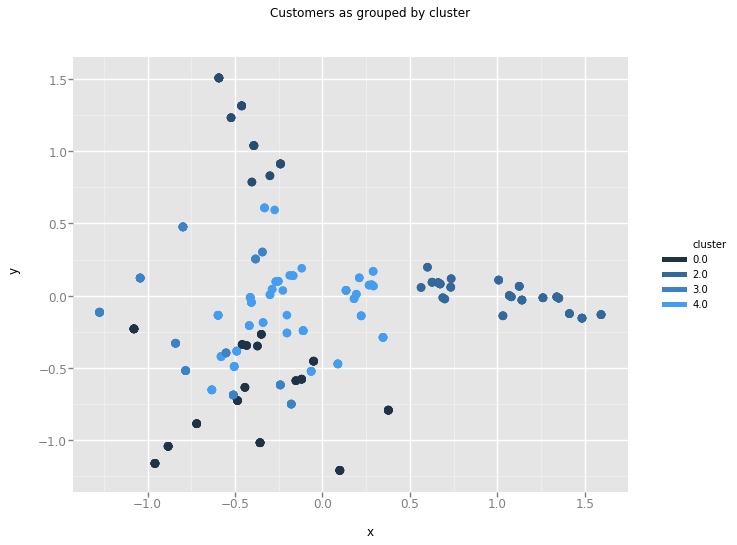

<ggplot: (-9223371878562029084)>

In [289]:
#Throw into scatterplot
df3 = pd.merge(df_transactions, customer_clusters)
df3 = pd.merge(df_offers, df3)

from ggplot import *

ggplot(df3, aes(x='x', y='y', color='cluster')) + geom_point(size=75) + \
            ggtitle('Customers as grouped by cluster')

In [290]:
#And for the centers:

#cluster_centers_bkp = cluster_centers.copy()

cluster.cluster_centers_.shape

(5, 32)

In [291]:
cluster.cluster_centers_[0].shape

(32,)

In [292]:
cluster.cluster_centers_[0].shape[0]

32

In [293]:


pca.transform(cluster.cluster_centers_)


array([[-0.39858297, -0.66304726],
       [-0.40217659,  1.10293412],
       [ 0.9517416 ,  0.01972707],
       [-0.63085619, -0.20516345],
       [-0.11935436, -0.05405665]])

In [295]:
cluster_centers = pca.transform(cluster.cluster_centers_)

In [299]:
cluster_centers

,x,y,cluster
0,-0.398583,-0.663047,0
1,-0.402177,1.102934,1
2,0.951742,0.019727,2
3,-0.630856,-0.205163,3
4,-0.119354,-0.054057,4


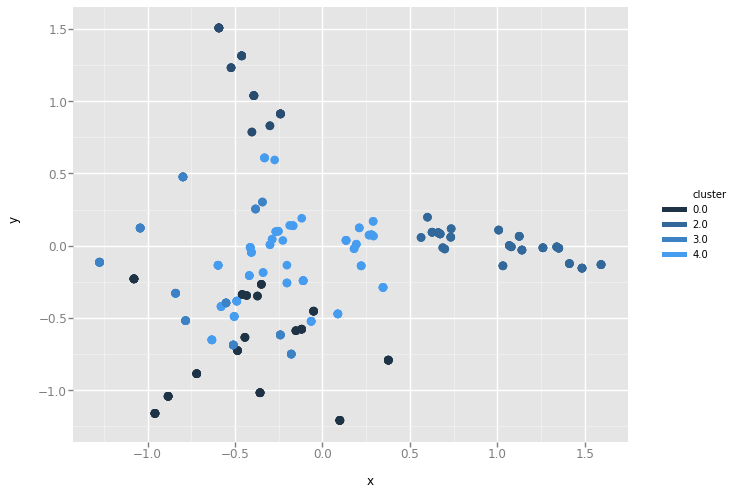

TypeError: Could not operate <ggplot: (158294927515)> with block values unsupported operand type(s) for +: 'ggplot' and 'float'

In [303]:
cluster_centers = pd.DataFrame(cluster_centers, columns = ['x','y'])

cluster_centers['cluster'] = range(0, len(cluster_centers))

ggplot(df3, aes(x='x', y='y', color='cluster')) + \
            geom_point(size=75) + \
            cluster_centers + \
            geom_point(size=500) + \
            ggtitle('Customers as grouped by cluster')

In [259]:
#geom_point(cluster_centers, size=500)   <---- need a bit of work in making the centroids pop

In [304]:
ggplot(aes(x='x',y='y'))

TypeError: __init__() missing 1 required positional argument: 'data'

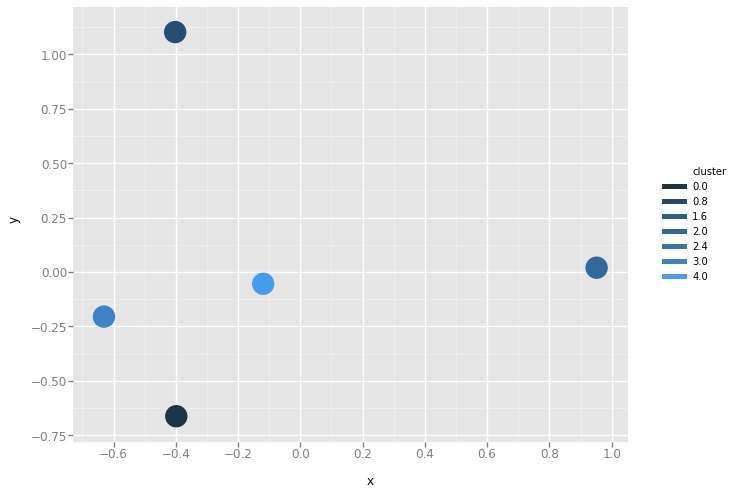

<ggplot: (158294492585)>

In [311]:
ggplot(cluster_centers, aes(x='x',y='y', color='cluster')) + \
    geom_point(size=500)# + geom_point(data=df3,size=75)

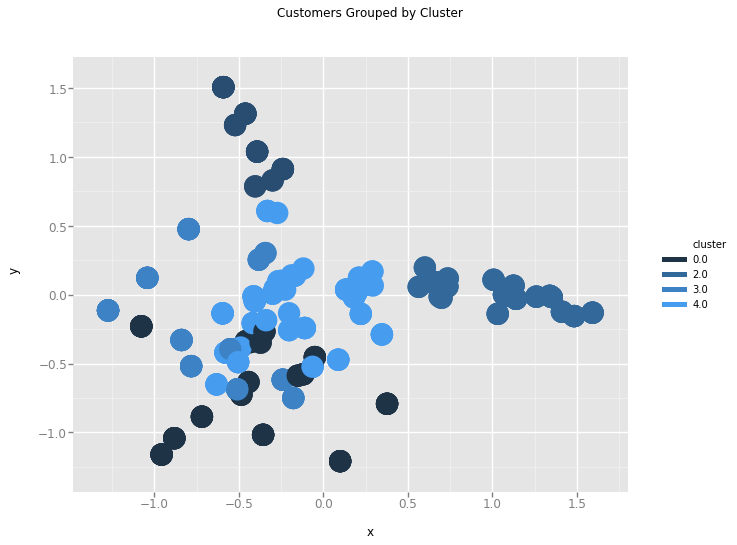

<ggplot: (-9223371878557689449)>

In [314]:
ggplot(df3, aes(x='x', y='y', color='cluster')) + \
    geom_point(df3, size=75) + \
    geom_point(cluster_centers, size=500) +\
    ggtitle("Customers Grouped by Cluster")

In [315]:
df3['is_4'] = df3.cluster==4

In [316]:
df3.groupby('is_4').varietal.value_counts()

is_4   varietal          
False  Champagne             52
       Pinot Noir            42
       Espumante             30
       Malbec                30
       Prosecco              28
       Cabernet Sauvignon    15
       Pinot Grigio          15
       Merlot                12
       Chardonnay             7
True   Champagne             29
       Cabernet Sauvignon    17
       Prosecco              15
       Espumante             10
       Chardonnay             8
       Merlot                 8
       Malbec                 2
       Pinot Grigio           2
       Pinot Noir             2
Name: varietal, dtype: int64

In [317]:
df3.groupby('is_4')[['min_qty', 'discount']].mean()

,min_qty,discount
is_4,,
False,52.779221,57.242424
True,72.387097,65.043011
